<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.1 
# *Data Wrangling and Munging with Pandas*

## Part 1: Wrangling Data

The term "data wrangling" is analogous to capturing wild horses and getting them into a fenced area; the horses are data and the fencing is your computer. The more common data wrangling tasks include:

- reading flat files
- reading Excel files
- downloading from web pages
  - csv
  - html
  - json

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

*It is good practice to display the library version numbers for future reference:*

In [4]:
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.21.2
Pandas:  1.3.4


### CSV Files

Below are three attempts to load the file "bikeshare.csv" into a DataFrame named `bikes`. Why are they wrong?

In [142]:
# wrong:
#bikes = pd.read_table('dat/mbikeshare.csv', header = None)
#print(bikes.head())
#print()

# wrong:
#bikes = pd.read_table('dat/bikeshare.csv', header = 1)
#print(bikes.head())
#print()

# wrong:
#bikes = pd.read_table('dat/bikeshare.csv', header = 0)
#print(bikes.head())



?ANSWER: File is comma delimited, sep argument not specified (default is tab stop)

Load the file "bikeshare.csv" into a DataFrame named `bikes`, and confirm that it was loaded properly:

In [11]:
#ANSWER:
bikes = pd.read_table('/Users/damien/Documents/institute_of_data/dat/mod2/bikeshare.csv', sep = ',')
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Note that we could have used `read.csv()` above. When is `read_table()` necessary?

Flat files can be full of surprises. Here are some issues to watch out for:

- separator character is something other than the comma
  - ";", "|", and tab are popular
- newline character is something other than what the O/S expects 
  - Tip: Don't hard-code the character codes for carriage returns, linefeeds, etc. Use Python's built-in representation instead (e.g. Python translates "\n" to the newline character and "\t" to the tab character on any O/S).
- truncated lines
  - if there are empty fields at the end of a line it is possible that their separators will be missing, resulting in a "jagged" file
- embedded commas or quotes
  - a free-text field containing embedded commas may split into separate fields on input
  - a free-text field containing embedded quotes may not parse correctly
- unescaped characters
  - the "\" character indicates a control code to Python, which will break the I/O
    - e.g. the substring "\u0123" will be interpreted as Unicode(0123) -- which may not be what the file creator intended
  - these may need to be fixed by loading whole strings and then parsing into a new data frame
  
Tip: Most issues can be delth with by correctly specifying the parameters of the function you use to load the file. Read the doco before reading the data!

### Reading Excel Files

In [12]:
from pandas import ExcelFile  # Nb. Need to install xlrd from conda (it does not automatically install with pandas)

In [13]:
df = pd.read_excel('/Users/damien/Documents/institute_of_data/dat/mod2/Iris.xls')
df

,Species_No,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,1,0.2,1.4,3.5,5.1,Setosa
1,1,0.2,1.4,3.0,4.9,Setosa
2,1,0.2,1.3,3.2,4.7,Setosa
3,1,0.2,1.5,3.1,4.6,Setosa
4,1,0.2,1.4,3.6,5.0,Setosa
...,...,...,...,...,...,...
145,3,2.3,5.2,3.0,6.7,Verginica
146,3,1.9,5.0,2.5,6.3,Verginica
147,3,2.0,5.2,3.0,6.5,Verginica
148,3,2.3,5.4,3.4,6.2,Verginica


So, this file appears to have an embedded table of aggregates on the same sheet as the raw data (a naughty but common practice amongst analysts).

It is usually better to load data correctly than to meddle with the source file or load it 'warts and all' and then try to parse it in code. The Pandas functions for reading files have parameters that provide the control we need. For ecxample, we could make multiple calls to `read_excel()`, using combinations of the `header`, `usecols`, `skiprows`, `nrows`, and `skipfooter` parameters to load one table at a time from a spreadsheet with multiple tables.

Load the above file without the unwanted columns:

In [14]:
#ANSWER
#can't see the aggregate table in the Iris.xls file downloaded from google drive, so just selected random rows/cols to exclude below

pd.read_excel('/Users/damien/Documents/institute_of_data/dat/mod2/Iris.xls', sheet_name='Data', usecols='B:F', nrows=50, header=0)

,Petal_width,Petal_length,Sepal_width,Sepal_length,Species_name
0,0.2,1.4,3.5,5.1,Setosa
1,0.2,1.4,3.0,4.9,Setosa
2,0.2,1.3,3.2,4.7,Setosa
3,0.2,1.5,3.1,4.6,Setosa
4,0.2,1.4,3.6,5.0,Setosa
5,0.4,1.7,3.9,5.4,Setosa
6,0.3,1.4,3.4,4.6,Setosa
7,0.2,1.5,3.4,5.0,Setosa
8,0.2,1.4,2.9,4.4,Setosa
9,0.1,1.5,3.1,4.9,Setosa


### Importing Data Directly from the Web

We usually want to store a local copy of a data file that we download from the Web, but when data retention is not a priority it is convenient to download the data directly into our running Python environment.

#### Importing Text Files from the Web

The web is the 'wild west' of data formats. However, we can usually expect good behaviour from files that are automatically generated by a service, such as the earthquake report:

In [15]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_hour.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-26T04:13:21.603Z,-21.4277,174.4767,520.5,5.8,mww,NaN,38,4.978,0.87,...,2021-11-26T04:31:43.040Z,Vanuatu region,earthquake,9.5,6.6,0.066,22,reviewed,us,us


#### Importing HTML Files from the Web

Working with unstructured HTML files relies heavily on library functions. This one, however, is well-structured:

In [16]:
url = 'https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/'

# Load 
df = pd.read_html(url)[0]
df.head()

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534


#### Importing XML Files from the Web

XML files are semi-structured, but you're at the mercy of the file creator. If every record has the same format it will be much easier, but practical applications often require a lot of custom code. Here is an example that includes a nice parser class: http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/

In [17]:
url = 'http://www.austintaylor.io/lxml/python/pandas/xml/dataframe/2016/07/08/convert-xml-to-pandas-dataframe/'

# Load the XML file into a data frame
df = pd.read_html(url)[0]
df.head()

,Unnamed: 0,ID,String,Description,Type,Comment,Link1,Link2
0,0,id_a_f_3,!Susie (http://www.sync2it.com/susie),Sync2It bookmark management & clustering engine,C R,None,http://www.sync2it.com,None
1,1,id_a_f_6,<a href='http://www.unchaos.com/'> UnChaos </a...,UnCHAOS search robot,R,Site is dead,http://www.unchaos.com/,None
2,2,id_a_f_7,<a href='http://www.unchaos.com/'> UnChaos Bot...,UnCHAOS search robot,R,Site is dead,http://www.unchaos.com/,None


#### Importing JSON Files from the Web
https://www.dataquest.io/blog/python-json-tutorial/

Like XML, JSON files are semi-structured and may require work to capture the schema into a dataframe. Here is a simple example: 

In [18]:
url = 'https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/data.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient = 'columns')
df.head()

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0
2,9,2015-01-01 00:00:02,0
3,6,2015-01-01 00:00:03,0
4,6,2015-01-01 00:00:04,0


## Part 2: Data Munging

Data munging is manipulating data to get it into a form that we can start running analyses on (which usually means getting the data into a DataFrame). Before we get to this stage, we may need to remove headers or footers, transpose columns to rows, split wide data tables into long ones, and so on. (Nb. Excel files can be particularly troublesome, because users can format their data in mixed, complex shapes.) Essentially, we need to follow Hadley Wickham's guidelines for tidy datasets (http://vita.had.co.nz/papers/tidy-data.html):

The end goal of the cleaning data process:

- each variable should be in one column
- each observation should comprise one row
- each type of observational unit should form one table
- include key columns for linking multiple tables
- the top row contains (sensible) variable names
- in general, save data as one file per table


### Dataset Morphology

Once we have our dataset in a DataFrame (or Series, if our data is only 1-dimensional), we can start examining its size and content.

How many rows and columns are in `bikes`?

In [19]:
#ANSWER
#17379 rows, 17 columns
bikes.shape

(17379, 17)

What are the column names in `bikes`?

In [20]:
#ANSWER
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

What are the data types of these columns?

In [21]:
#ANSWER
bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

What is the (row) index for this DataFrame?

In [22]:
#ANSWER
bikes.index

RangeIndex(start=0, stop=17379, step=1)

## Slicing and Dicing

It is often preferable to refer to DataFrame columns by name, but there is more than one way to do this. 
Do `bikes['season']` and `bikes[['season']]` give the same object? Demonstrate:

In [23]:
#ANSWER

#No

print(type(bikes['season']))
print(type(bikes[['season']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


How would we use object notation to show the first 4 rows of `atemp`?

In [24]:
#ANSWER
#N.B: Call atemp as an object, don't use .head()
print(bikes.atemp[0:4])

0    0.2879
1    0.2727
2    0.2727
3    0.2879
Name: atemp, dtype: float64


Algorithms that loop over multiple columns often access DataFrame columns by index. However, none of the following work (try them out by uncommenting / removing the "#E: " ): 

In [141]:
#bikes[[0]]
#E: bikes[0]
#E: bikes[0,0]
#E: bikes[[0,0]]

What is the correct way to access the 1st row of the DataFrame by its index?

In [61]:
#ANSWER
bikes.iloc[0]

instant                 1
dteday         2011-01-01
season                  1
yr                      0
mnth                    1
hr                      0
holiday                 0
weekday                 6
workingday              0
weathersit              1
temp                 0.24
atemp              0.2879
hum                  0.81
windspeed             0.0
casual                  3
registered             13
cnt                    16
atemp_level          mild
Name: 0, dtype: object

What is the correct way to access the 2nd column of the DataFrame by its index?

In [62]:
#ANSWER
bikes.iloc[:, 1]

0        2011-01-01
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17374    2012-12-31
17375    2012-12-31
17376    2012-12-31
17377    2012-12-31
17378    2012-12-31
Name: dteday, Length: 17379, dtype: object

## Handling Missing Values

What is the Pandas `isnull` function for? 

We can apply `isnull` to the `bikes` DataFrame to show the result for every element:

In [63]:
bikes.isnull().head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_level
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


However, we usually start at a higher level. How many nulls are in `bikes` altogether?

In [64]:
#ANSWER
bikes.isnull().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
atemp_level    0
dtype: int64

If this result were nonzero we would next want to find out which columns contained nulls. How can this be done in one line of code?

In [65]:
#ANSWER
bikes.isnull().any()

instant        False
dteday         False
season         False
yr             False
mnth           False
hr             False
holiday        False
weekday        False
workingday     False
weathersit     False
temp           False
atemp          False
hum            False
windspeed      False
casual         False
registered     False
cnt            False
atemp_level    False
dtype: bool

What is the Numpy object `nan` used for? (Write a descriptive answer.)

Write (and verify) a function that performs simple division with built-in handling of the edge case (i.e. return a nan value instead of just producing an error):

In [66]:
#ANSWER
def simple_div(num1, num2):
    
    """performs simple divison"""
    
    if num1 == 0:
        return float('NaN')
    elif num2 == 0:
        return float('Nan')
    else:
        return num1 / num2

print(simple_div(1, 0))
print(simple_div(0, 1))
print(simple_div(1, 2))


nan
nan
0.5


Apply the Pandas `isna` function to the following data objects:

In [67]:
x = 2.3
y = np.nan
print(x, y)

2.3 nan


In [68]:
#ANSWER
print(pd.isna(x))
print(pd.isna(y))

False
True


In [69]:
array = np.array([[1, np.nan, 3], [4, 5, np.nan]])
print(array)

[[ 1. nan  3.]
 [ 4.  5. nan]]


In [70]:
#ANSWER
pd.isna(array)

array([[False,  True, False],
       [False, False,  True]])

How is the pandas I/O parameter `na_values` used?

## Data Profiling

### Counts

When there are categorical variables in a dataset we will want to know how many possible values there are in each column. (Nb. If the dataset is a sample of a larger one, our sample may not capture all possible values of every categorical.)

How many (different) seasons are in `bikes`?

In [140]:
#ANSWER
bikes[['season']].value_counts()

season
3         4496
2         4409
1         4242
4         4232
dtype: int64

### Ranges

Print the range of the `instant`, `dteday`, and `windspeed` columns: 

In [72]:
#ANSWER
print('The range of instant is:', bikes.instant.max() - bikes.instant.min())

dteday_range = pd.date_range(start=bikes.dteday[0], end=bikes.dteday[17378])
print('The range of dteday is:', dteday_range.min(), 'to', dteday_range.max())
print('The range of windspeed is:', bikes.windspeed.max() - bikes.windspeed.min())

The range of instant is: 17378
The range of dteday is: 2011-01-01 00:00:00 to 2012-12-31 00:00:00
The range of windspeed is: 0.8507


Compute and print the overall minimum and maximum of the data columns:

In [143]:
#ANSWER
bikes_min = min(bikes.min(numeric_only=True))
bikes_max = max(bikes.max(numeric_only=True))
bikes_min, bikes_max

(0.0, 17379.0)

### Quantiles

Pandas makes computing quantiles easy. This is how to get the median of a Series:

In [74]:
bikes['atemp'].quantile(0.5)

0.4848

Of course, the `quantiles` method can take a tuple as its argument. Compute the 10th, 25th, 50th, 75th, and 90th percentiles in one line of code: 

In [75]:
#ANSWER
bikes['atemp'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

0.10    0.2424
0.25    0.3333
0.50    0.4848
0.75    0.6212
0.90    0.6970
Name: atemp, dtype: float64

### Cuts

Sometimes we want to split the sample not by the quantiles of the distribution but by the range of the data. Let's take a closer look at `atemp`:

In [76]:
type(bikes['atemp'])

pandas.core.series.Series

In [77]:
bikes.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,atemp_level
14573,14574,2012-09-04,3,1,9,10,0,2,1,2,0.72,0.6970,0.74,0.2537,42,130,172,warm
12637,12638,2012-06-15,2,1,6,18,0,5,1,1,0.72,0.6515,0.39,0.2239,121,572,693,warm
3638,3639,2011-06-05,2,0,6,12,0,0,0,2,0.64,0.6061,0.69,0.1045,123,212,335,warm
9051,9052,2012-01-18,1,1,1,1,0,3,1,2,0.46,0.4545,0.77,0.3284,0,10,10,mild
14614,14615,2012-09-06,3,1,9,3,0,4,1,1,0.70,0.6667,0.84,0.1045,0,9,9,warm


Suppose we decide to sort these values into 4 bins of equal width, but we want to apply the resulting groups to the entire DataFrame. Basically, we need to add a row label that indcates which bin each sample belongs in. Let's call this label "atemp_level", and use the `cut` method to populate it:

In [78]:
atemp_level = pd.cut(bikes['atemp'], bins = 4)         

What is `atemp_level`?

In [79]:
#ANSWER

#A pandas series object

type(atemp_level)

pandas.core.series.Series

Here is a random sample of `atemp_level`:

In [80]:
atemp_level.sample(5)          

6964     (0.25, 0.5]
3591     (0.5, 0.75]
7182     (0.25, 0.5]
41       (0.25, 0.5]
16468    (0.25, 0.5]
Name: atemp, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 0.25] < (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0]]

So, by default, `cut` produces labels that indicate the bin boundaries for each element in the series it was applied to. Usually, we will specify labels that are appropriate to the discretisation we are applying:

In [81]:
atemp_level = pd.cut(bikes['atemp'], bins = 4, labels = ["cool", "mild", "warm", "hot"])
atemp_level.sample(5)          

4590     warm
7519     warm
192      cool
15540    warm
16878    mild
Name: atemp, dtype: category
Categories (4, object): ['cool' < 'mild' < 'warm' < 'hot']

Incorporate the new `atemp_level` column into the `bikes` DataFrame and use it to count the number of "mild" `atemp` entries in `season` 2:

In [144]:
#ANSWER
bikes['atemp_level'] = atemp_level
bikes[(bikes.atemp_level == 'mild') & (bikes.season == 2)].count()

instant        1829
dteday         1829
season         1829
yr             1829
mnth           1829
hr             1829
holiday        1829
weekday        1829
workingday     1829
weathersit     1829
temp           1829
atemp          1829
hum            1829
windspeed      1829
casual         1829
registered     1829
cnt            1829
atemp_level    1829
dtype: int64

*Nb. The `atemp_level` variable we created is what the R language calls a "factor". Pandas has introduced a new data type called "category" that is similar to R's factors.*

# Synthetic Data

Sometimes we may want to generate test data, or we may need to initalise a series, matrix, or data frame for input to an algorithm. Numpy has several methods we can use for this.

Execute the following, then check the shape and content of each variable:

In [83]:
# Creating arrays with initial values
a = np.zeros((3))
b = np.ones((1,3))
c = np.random.randint(1,10,(2,3,4))   # randint(low, high, size)
d = np.arange(4)
e = np.array( [[1,2,3,4], [5,6,7,8]] )

In [145]:
# Cleaning Data

def check(a):
    print(a)
    print(type(a))
    print(a.shape)
    print('\n')
    
check(a)
check(b)
check(c)
check(d)
check(e)

[0. 0. 0.]
<class 'numpy.ndarray'>
(3,)


[[1. 1. 1.]]
<class 'numpy.ndarray'>
(1, 3)


[[[6 3 7 6]
  [2 6 2 8]
  [2 1 1 9]]

 [[9 8 7 5]
  [8 1 7 2]
  [9 2 5 4]]]
<class 'numpy.ndarray'>
(2, 3, 4)


[0 1 2 3]
<class 'numpy.ndarray'>
(4,)


[[1 2 3 4]
 [5 6 7 8]]
<class 'numpy.ndarray'>
(2, 4)




## Load Data

Load rock.csv and clean the dataset.

In [201]:
#ANSWER
rock = pd.read_csv('/Users/damien/Documents/institute_of_data/dat/mod2/rock.csv')
rock.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


## Check Column Names

Check column names and clean.

In [202]:
#ANSWER

# Whereabouts can we find documentation for these datasets? Not sure what F*G stands for.

rock.columns = ['song', 'artist', 'release_year', 'combined', 'first', 'year', 'playcount', 'fg']
rock.head()

,song,artist,release_year,combined,first,year,playcount,fg
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


## Replace Null Values With 0

Check 'release' column whether this column have any null value or not. Replace null value with 0.

In [204]:
#ANSWER
print(rock.release_year.isnull().sum())
rock['release_year'] = rock.release_year.fillna(0)

0


## Check Datatypes of Dataset

Check datatypes of the dataset. Is there any column which should be int instead of object? Fix the column. 

In [205]:
#ANSWER
rock.dtypes

song            object
artist          object
release_year    object
combined        object
first            int64
year             int64
playcount        int64
fg               int64
dtype: object

## Check Min, Max of Each Column

Is there any illogical value in any column? How can we fix that?

In [206]:
#ANSWER

rock.describe().T

# column 'first' has only one value (1), so col probably not very useful and could be removed (would need to check documentation first)


,count,mean,std,min,25%,50%,75%,max
first,2230.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
year,2230.0,0.741256,0.438043,0.0,0.0,1.0,1.0,1.0
playcount,2230.0,16.872646,25.302972,0.0,1.0,4.0,21.0,142.0
fg,2230.0,15.048430,25.288366,0.0,0.0,3.0,18.0,142.0


In [207]:
#release_year contains SONGFACTS.COM as a year

rock['release_year'].value_counts()
rock['release_year'].replace('SONGFACTS.COM', 0, inplace=True)
rock['release_year'] = rock.release_year.astype('int64')

<AxesSubplot:>

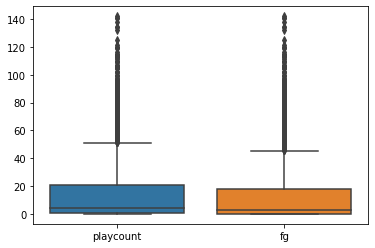

In [208]:
# col 'playcount' and 'fg' appear to have the same max value, which is much higher than other values in series, suggesting outlier. 
# Looks like there are lots of outliers in playcount and fg, removing may not be wise as it will reduce the amount of data we have.

sns.boxplot(data=rock[['playcount', 'fg']])

In [180]:
#If there were fewer outliers, could use:

#z_scores = stats.zscore(rock.playcount)

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all()
#rock['playcount'] = filtered_entries

# Write Some Functions

## Write a function that will take a row of a DataFrame and print out the song, artist, and whether or not the release date is < 1970

In [209]:
#ANSWER
def check_song(row):
    print('Song: ', row['song'])
    print('Artist: ', row['artist'])
    print('Released before 1970: ', row['release_year'] < 1970)

## Write a function that converts cells in a DataFrame to float and otherwise replaces them with np.nan

In [213]:
#ANSWER
def to_float(data):
    for i in data:
        if data[i].dtypes == 'int64':
            data[i] = data[i].astype(float)
        else:
            data[i] = np.NaN
    return data

## Apply these functions to your dataset

In [211]:
#ANSWER
check_song(rock.iloc[3])

Song:  Rockin' Into the Night
Artist:  .38 Special
Released before 1970:  False


In [214]:
#Don't understand why this isn't working

rock.apply(to_float)

KeyError: 'Caught Up in You'

## Describe the new float-only DataFrame.

In [215]:
#ANSWER
rock.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,2230.0,1465.331390,867.196161,0.0,0.0,1973.0,1981.0,2014.0
first,2230.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
year,2230.0,0.741256,0.438043,0.0,0.0,1.0,1.0,1.0
playcount,2230.0,16.872646,25.302972,0.0,1.0,4.0,21.0,142.0
fg,2230.0,15.048430,25.288366,0.0,0.0,3.0,18.0,142.0




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



